## Tasa de abandono de clientes


dataset source: https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers

In [ ]:
#!pip install dtale

In [ ]:
#!pip install pycaret[full]

## Librerías y Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/andres8arojas/Datos_cursos/main/Churn_Modelling.csv')

In [ ]:
# Si necesita usar dtale
#import dtale
#import dtale.app as dtale_app

#dtale_app.USE_COLAB = True
#dtale.show(dataset)

## Exploración

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

##Elimine las filas repetidas

In [ ]:
dataset.drop_duplicates()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


##Elimine las columnas que no aportan información relevante para el modelo.

In [ ]:
dataset = dataset.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

##Verfique si hay valores perdidos

In [ ]:
dataset.isna().values.any()

False

##¿Cuál genero tiene más probabilidad de abandonar? Porcentaje.


In [ ]:
tabla_gender = dataset.groupby('Gender').mean()
tabla_gender


<ipython-input-9-48e72f5df3b8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tabla_gender = dataset.groupby('Gender').mean()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [ ]:
print("El genero que tiene más probabilidad de abandonar es: ", 0.250715*100,"%")

El genero que tiene más probabilidad de abandonar es:  25.0715 %


##¿De qué región son los habitantes que tienen más probabilidad de abandonar? Porcentaje.


In [ ]:
tabla_geo = dataset.groupby('Geography').mean()
tabla_geo

<ipython-input-11-8ab2555d6c9a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tabla_geo = dataset.groupby('Geography').mean()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [ ]:
print("El país que tiene más probabilidad de abandonar es Alemania y la probabilidad de abandonar es: ", 0.324432*100,"%")

El país que tiene más probabilidad de abandonar es Alemania y la probabilidad de abandonar es:  32.4432 %


## ¿De qué región y genero son los habitantes que tienen más probabilidad de abandonar? Porcentaje.


In [ ]:
tabla_geo_gender = dataset.groupby(by= ['Gender', 'Geography']).mean() 
tabla_geo_gender

CreditScore        Age    Tenure        Balance  \
Gender Geography                                                    
Female France      649.185759  38.773994  4.950022   60322.670159   
       Germany     653.093881  40.154233  4.965633  119145.966471   
       Spain       651.769513  39.199265  5.000000   59862.092534   
Male   France      650.064657  38.296404  5.049401   63546.284875   
       Germany     649.966565  39.424772  5.050152  120259.668222   
       Spain       650.992075  38.649135  5.057637   63352.833746   

                  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
Gender Geography                                                              
Female France          1.547545   0.697921        0.513932     99564.252755   
       Germany         1.511316   0.706622        0.468567    102446.424124   
       Spain           1.573003   0.707989        0.516988    100734.107475   
Male   France          1.517254   0.713767        0.519070    100174.252495   
       Germany         1.527356   0.720365        0.523556     99905.033959   
       Spain           1.512968   0.684438        0.539625     98425.687680   

                    Exited  
Gender Geography            
Female France     0.203450  
       Germany    0.375524  
       Spain      0.212121  
Male   France     0.127134  
       Germany    0.278116  
       Spain      0.131124

In [ ]:
print("El país que tiene más probabilidad de abandonar es Alemania, el genero es el femenino y la probabilidad de abandonar es: ", 0.375524*100,"%")

El país que tiene más probabilidad de abandonar es Alemania, el genero es el femenino y la probabilidad de abandonar es:  37.552400000000006 %


##Calcule la edad máxima y mínima de los clientes.

In [ ]:
info_df_age_max = dataset.Age.max()
info_df_age_min = dataset.Age.min()
info_df_age_max
info_df_age_min

18

In [ ]:
print("La edad máxima es de",info_df_age_max , "años y la edad mínima es de", info_df_age_min, "años")

La edad máxima es de 92 años y la edad mínima es de 18 años


## Agregue otra columna al dataset que agrupe por los siguientes rangos de edad. ¿Cuál rango de edad tiene más probabilidad de abandonar

In [ ]:
age_bins = [18,27,37,47,57,67,77,87,92]

In [ ]:
age_labels = ["18-27","28-37","38-47",'48-57','58-67','68-77','78-87','87-92']

In [ ]:
# Crear una copia del dataset
dataset1 = dataset.copy(deep=True) 

In [ ]:
# Agregue la columna AgeGroup a dataset1
dataset1["AgeGroup"] = pd.cut(dataset1['Age'], bins = age_bins, labels = age_labels)

In [ ]:
# Verifique
dataset1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,38-47
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,38-47
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,38-47
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,38-47
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,38-47


In [ ]:
group_age=pd.DataFrame(dataset1.groupby('AgeGroup').Exited.agg(['sum','size']))
group_age

,sum,size
AgeGroup,,
18-27,71,998
28-37,389,4067
38-47,786,3203
48-57,583,1055
58-67,183,463
68-77,22,168
78-87,1,21
87-92,0,3


In [ ]:
# Calcule el porcentaje por rango de edad que abandona 
print("El porcentaje que mas abandona es: ",(786*100)/3203)


El porcentaje que mas abandona es:  24.539494224164844


## Variables categóricas

Cree una función que codifique las variables categóricas. Descomentar la función siguiente.

In [ ]:

from sklearn.preprocessing import OneHotEncoder

def codificar(df,col):
  # Ingresar el dataframe df y una lista de las columnas categóricas col.
  df = dataset.copy()
  codificador = OneHotEncoder()
  codificacion = codificador.fit_transform(df[col]).toarray()
  codificacion = pd.DataFrame(codificacion, columns=np.concatenate(codificador.categories_))
  df.drop(col, axis=1, inplace=True)
  df = pd.concat([df,codificacion],axis=1) 
  return df


In [ ]:
# Use la función anterior en las columnas con variables categóricas
data_encod = codificar(dataset,['Geography', 'Gender'])
data_encod.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0


## Correlaciones

<AxesSubplot: >

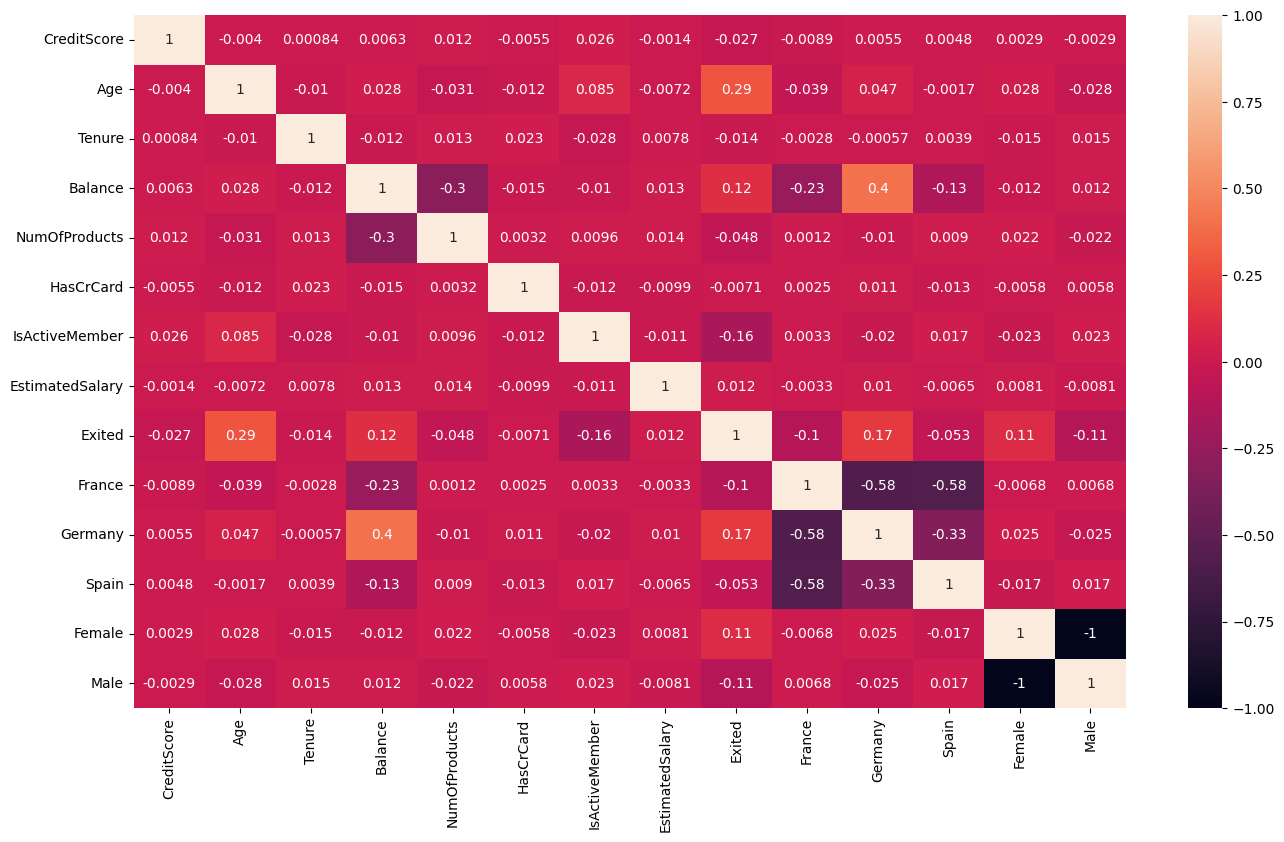

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(data_encod.corr(), annot=True)

## Pycaret

In [ ]:
from pycaret.classification import *
clf1 = setup(data = data_encod, target = 'Exited', train_size = 0.8)

,Description,Value
0,Session id,5121
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(10000, 14)"
4,Transformed data shape,"(10000, 14)"
5,Transformed train set shape,"(8000, 14)"
6,Transformed test set shape,"(2000, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8625,0.8592,0.4626,0.7722,0.5780,0.5020,0.5259,1.6250
catboost,CatBoost Classifier,0.8625,0.8586,0.4828,0.7549,0.5882,0.5106,0.5293,5.2490
rf,Random Forest Classifier,0.8605,0.8432,0.4577,0.7629,0.5718,0.4947,0.5179,1.5800
lightgbm,Light Gradient Boosting Machine,0.8600,0.8548,0.4865,0.7371,0.5857,0.5057,0.5218,0.3220
xgboost,Extreme Gradient Boosting,0.8567,0.8396,0.4908,0.7168,0.5823,0.4996,0.5128,1.2890
ada,Ada Boost Classifier,0.8536,0.8411,0.4656,0.7175,0.5643,0.4812,0.4976,0.4430
et,Extra Trees Classifier,0.8524,0.8361,0.4153,0.7481,0.5338,0.4546,0.4826,1.0960
lda,Linear Discriminant Analysis,0.8069,0.7623,0.2258,0.5646,0.3221,0.2332,0.2667,0.0750
ridge,Ridge Classifier,0.8064,0.0000,0.1166,0.6328,0.1961,0.1424,0.2098,0.0490
dummy,Dummy Classifier,0.7962,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1140


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [ ]:
print(best)

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=5121, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), <catboost.core.CatBoostClassifier object at 0x7fbfa413de70>, RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samp

## train set - test set

In [ ]:
X = data_encod.drop(columns='Exited')

In [ ]:
y = data_encod['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##GradientBoostingClassifier


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_gbc =  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=4733, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
classifier_gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=4733, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred1 = classifier_gbc.predict(X_test)

In [ ]:
# Métricas
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred1)
prec = precision_score(y_test, y_pred1)
rec = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

results = pd.DataFrame([['gbc', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,gbc,0.8685,0.755396,0.518519,0.614934


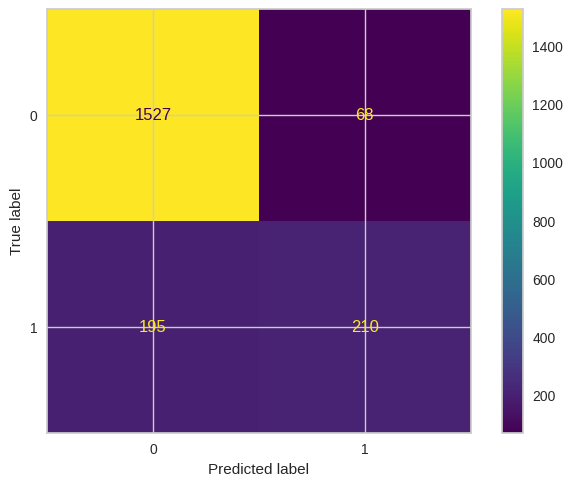

In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Tarea: Realizar lo mismo para el Random Forest (Desde el Gradiente)

In [ ]:
print(best)

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=5121, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), <catboost.core.CatBoostClassifier object at 0x7fbfa413de70>, RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samp

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf =  	RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=1080, verbose=0, warm_start=False)

In [ ]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=1080, verbose=0, warm_start=False)

In [ ]:
y_pred1 = classifier_rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred1)
prec = precision_score(y_test, y_pred1)
rec = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

results = pd.DataFrame([['rf', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,rf,0.868,0.766038,0.501235,0.60597


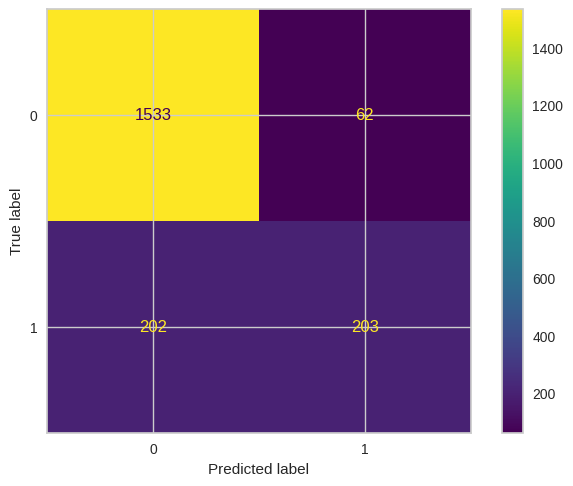

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()